# KL Divergence

In this notebook, I adopt the convention that we use the KLD to find the best $q(x)$ distribution to match $p(x)$.

$KL(q||p) = E_{q}[log \frac{q(x)}{p(x)}]$

Because of the fractional term, the KL is not symmetric. If there is a point where $q(x)$ is not zero, but $p(x)$ is, then the KLD will be infinite. So this formulation doesn't penalize when $q$ is small and $p$ is large. This make it cheap for q to miss modes of p.

However, it is expensive when $q(x)$ is moderately large and $p(x)$ is close to 0. This means assigning any non-negligable mass to points where $p$ is near 0 is expensive.

$KL(p||q) = E_{p}[log \frac{p(x)}{q(x)}]$

The inverted formulation has a high penalty when $p(x)$ is not 0 and $q(x)$ is close to zero. This makes it expensive to not cover a mode of $p$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.special import kl_div
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
def p(x):
    return 0.5*norm.pdf(x, loc=0, scale=1) + 0.5*norm.pdf(x, loc=8, scale=1)

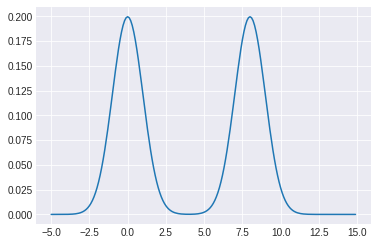

In [3]:
x = np.arange(-5, 15, 0.1)
plt.plot(x, p(x))

## Optimise q using KL(q||p)

In [4]:
min_kld = np.inf
best_mu = np.inf

for mu in np.arange(-5,15,0.1):
    for sigma in np.arange(0.1, 10, 0.1):
        q = norm(loc=mu, scale=sigma)
        
        kld = kl_div(q.pdf(x), p(x)).sum()
        if kld<min_kld:
            min_kld = kld
            best_mu = mu
            best_sigma = sigma

In [5]:
best_mu, best_sigma, min_kld

(7.9999999999999538, 1.0, 6.9305353623875545)

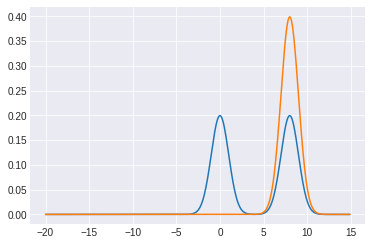

In [6]:
x = np.arange(-20, 15, 0.1)
plt.plot(x, p(x))
plt.plot(x, norm.pdf(x, loc=best_mu, scale=best_sigma))

## Optimise q using KL(p||q)

In [7]:
min_kld = np.inf
best_mu = np.inf

for mu in np.arange(-5,15,0.1):
    for sigma in np.arange(0.1, 10, 0.1):
        q = norm(loc=mu, scale=sigma)
        
        kld = kl_div( p(x), q.pdf(x)).sum()
        if kld<min_kld:
            min_kld = kld
            best_mu = mu
            best_sigma = sigma

In [8]:
best_mu, best_sigma, min_kld

(4.0999999999999677, 4.2000000000000002, 7.1928206127061181)

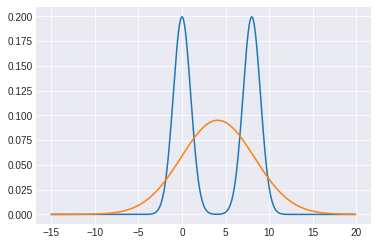

In [10]:
x = np.arange(-15, 20, 0.1)
plt.plot(x, p(x))
plt.plot(x, norm.pdf(x, loc=best_mu, scale=best_sigma))

# Summary

The KLD is not symmetric, and different formulations induce different behaviour. $KL(q||p)$ is likely to underestimate the variance, whilst $KL(p||q)$ is likely to overestimate it.